<a href="https://colab.research.google.com/github/XiaoLiang28/Xiao/blob/main/ps3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import code

In [ ]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

#import webbrowser                                                                                                           

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

Import data
Import: Data File 1: The percent of Bachelor's Degree or higher by state, 2020
https://fred.stlouisfed.org/release/tables?rid=330&eid=391444&od=2020-01-01#

In [ ]:
urllib.request.urlretrieve("https://github.com/XiaoLiang28/Xiao/blob/main/Edu2020.xlsx?raw=true","edu2020.xlsx")

('edu2020.xlsx', <http.client.HTTPMessage at 0x7ff45909b400>)

In [ ]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'edu2020.xlsx', 'sample_data']

In [ ]:
edu2020=pd.read_excel('edu2020.xlsx')

In [ ]:
edu2020.columns

Index(['State Name', 'Percent'], dtype='object')

In [ ]:
edu2020.head(3)

,State Name,Percent
0,Alabama,27.8
1,Alaska,31.9
2,Arizona,33.0


In [ ]:
edu2020.dtypes

State Name     object
Percent       float64
dtype: object

In [ ]:
edu2020

,State Name,Percent
0,Alabama,27.8
1,Alaska,31.9
2,Arizona,33.0
3,Arkansas,24.9
4,California,36.9
5,Colorado,44.2
6,Connecticut,42.4
7,Delaware,34.7
8,District of Columbia,63.6
9,Florida,33.7


In [ ]:
edu2020.value_counts()

State Name            Percent
Alabama               27.8       1
Pennsylvania          34.0       1
Nevada                28.0       1
New Hampshire         40.2       1
New Jersey            43.1       1
New Mexico            30.1       1
New York              39.5       1
North Carolina        34.8       1
North Dakota          31.8       1
Ohio                  30.6       1
Oklahoma              27.0       1
Oregon                36.3       1
Rhode Island          38.0       1
Montana               34.6       1
South Carolina        31.7       1
South Dakota          28.4       1
Tennessee             30.7       1
Texas                 33.2       1
Utah                  36.9       1
Vermont               42.1       1
Virginia              42.0       1
Washington            38.4       1
West Virginia         23.1       1
Wisconsin             31.8       1
Nebraska              33.3       1
Missouri              31.9       1
Alaska                31.9       1
Idaho                 30.

In [ ]:
edu2020.agg({'Percent':['mean','median',stdev]})

,Percent
mean,34.464706
median,33.500000
stdev,6.862677


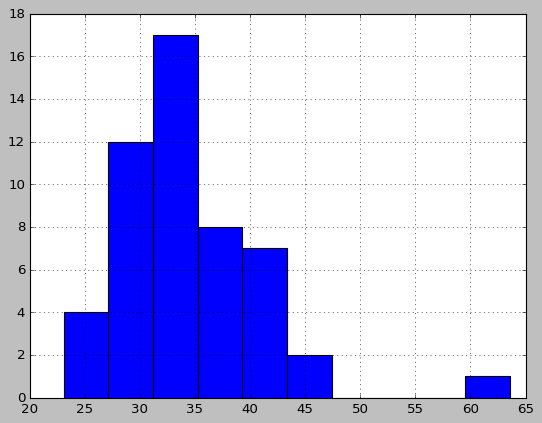

In [ ]:
edu2020["Percent"].hist()

The number of states which have people who get bacholar's degree or higher between 30% to 35% is the largest.

Import data: Import: Data File 2: The average age in US by state, 2020
https://www.statista.com/statistics/208048/median-age-of-population-in-the-usa-by-state/ 

In [ ]:
urllib.request.urlretrieve("https://github.com/XiaoLiang28/Xiao/blob/main/age2020.xlsx?raw=true","age2020.xlsx")

('age2020.xlsx', <http.client.HTTPMessage at 0x7ff427743490>)

In [ ]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'edu2020.xlsx', 'age2020.xlsx', 'sample_data']

In [ ]:
age2020=pd.read_excel('age2020.xlsx',sheet_name='Data')

In [ ]:
age2020.columns

Index(['Unnamed: 0', 'State Name', 'Average Age'], dtype='object')

In [ ]:
age2020.dropna(axis=1).dtypes

State Name      object
Average Age    float64
dtype: object

In [ ]:
age2020.head(3)

,Unnamed: 0,State Name,Average Age
0,NaN,Maine,44.8
1,NaN,New Hampshire,43.0
2,NaN,Vermont,42.8


In [ ]:
del age2020['Unnamed: 0']

In [ ]:
age2020.head(3)

,State Name,Average Age
0,Maine,44.8
1,New Hampshire,43.0
2,Vermont,42.8


In [ ]:
age2020.value_counts()

State Name            Average Age
Alabama               39.2           1
Pennsylvania          40.9           1
Nevada                38.2           1
New Hampshire         43.0           1
New Jersey            40.0           1
New Mexico            38.1           1
New York              39.0           1
North Carolina        38.9           1
North Dakota          35.2           1
Ohio                  39.5           1
Oklahoma              36.7           1
Oregon                39.5           1
Rhode Island          40.0           1
Montana               40.1           1
South Carolina        39.7           1
South Dakota          37.2           1
Tennessee             38.8           1
Texas                 34.8           1
Utah                  31.1           1
Vermont               42.8           1
Virginia              38.4           1
Washington            37.8           1
West Virginia         42.7           1
Wisconsin             39.6           1
Nebraska              36.6    

In [ ]:
age2020.agg({'Average Age':['mean','median',stdev]})

,Average Age
mean,38.558824
median,38.400000
stdev,2.394091


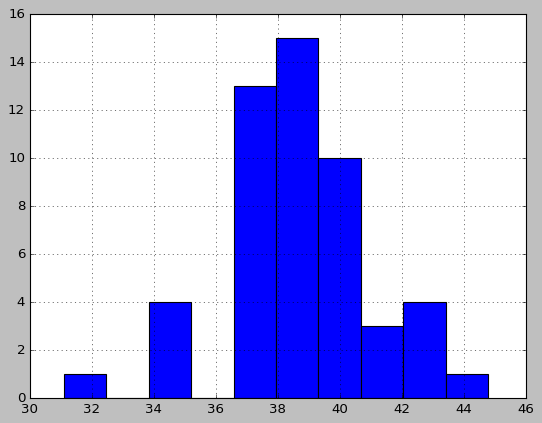

In [ ]:
age2020["Average Age"].hist()

The number of states which average age is between 38 - 40 is the largest.

In [ ]:
age2020['State Name']=age2020['State Name'].str.strip()

In [ ]:
edu2020['State Name']=edu2020['State Name'].str.strip()

In [ ]:
mergedOuter = pd.merge(edu2020, age2020, how='outer', on=['State Name'],indicator=True)
mergedOuter

,State Name,Percent,Average Age,_merge
0,Alabama,27.8,39.2,both
1,Alaska,31.9,34.6,both
2,Arizona,33.0,37.9,both
3,Arkansas,24.9,38.3,both
4,California,36.9,36.7,both
5,Colorado,44.2,36.9,both
6,Connecticut,42.4,41.1,both
7,Delaware,34.7,41.0,both
8,District of Columbia,63.6,34.1,both
9,Florida,33.7,42.2,both


In [ ]:
mergedOuter['_merge'].value_counts()
mergedOuter['State Name'][mergedOuter['_merge']=='left_only']
mergedOuter['State Name'][mergedOuter['_merge']=='right_only']

both          42
left_only      9
right_only     9
Name: _merge, dtype: int64

5        Colorado 
11         Hawaii 
13       Illinois 
17       Kentucky 
20       Maryland 
22       Michigan 
24    Mississippi 
30     New Jersey 
32       New York 
Name: State Name, dtype: object

51     New Jersey
52       Michigan
53         Hawaii
54       New York
55       Kentucky
56       Maryland
57       Illinois
58    Mississippi
59       Colorado
Name: State Name, dtype: object

In [ ]:
mergedInner = pd.merge(edu2020, age2020, how='inner', on=['State Name'])
mergedInner

,State Name,Percent,Average Age
0,Alabama,27.8,39.2
1,Alaska,31.9,34.6
2,Arizona,33.0,37.9
3,Arkansas,24.9,38.3
4,California,36.9,36.7
5,Connecticut,42.4,41.1
6,Delaware,34.7,41.0
7,District of Columbia,63.6,34.1
8,Florida,33.7,42.2
9,Georgia,34.8,36.9


In [ ]:
mergedLeft = pd.merge(edu2020, age2020, how='left', on=['State Name'])
mergedLeft

,State Name,Percent,Average Age
0,Alabama,27.8,39.2
1,Alaska,31.9,34.6
2,Arizona,33.0,37.9
3,Arkansas,24.9,38.3
4,California,36.9,36.7
5,Colorado,44.2,36.9
6,Connecticut,42.4,41.1
7,Delaware,34.7,41.0
8,District of Columbia,63.6,34.1
9,Florida,33.7,42.2


In [ ]:
mergedRight = pd.merge(edu2020, age2020, how='left', on=['State Name'])
mergedRight

,State Name,Percent,Average Age
0,Alabama,27.8,39.2
1,Alaska,31.9,34.6
2,Arizona,33.0,37.9
3,Arkansas,24.9,38.3
4,California,36.9,36.7
5,Colorado,44.2,36.9
6,Connecticut,42.4,41.1
7,Delaware,34.7,41.0
8,District of Columbia,63.6,34.1
9,Florida,33.7,42.2


In [ ]:
edu2020_age2020 = pd.merge(edu2020, age2020, how='right', on=['State Name'], indicator=True)
mergedRight

,State Name,Percent,Average Age
0,Alabama,27.8,39.2
1,Alaska,31.9,34.6
2,Arizona,33.0,37.9
3,Arkansas,24.9,38.3
4,California,36.9,36.7
5,Colorado,44.2,36.9
6,Connecticut,42.4,41.1
7,Delaware,34.7,41.0
8,District of Columbia,63.6,34.1
9,Florida,33.7,42.2


In [ ]:
import seaborn as sns
edu2020_age2020 = sns.load_dataset('iris')

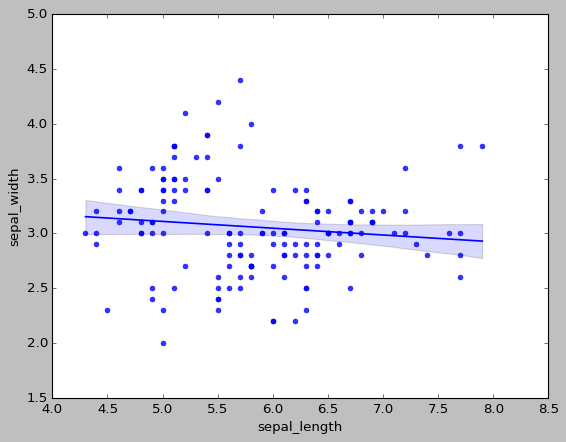

In [ ]:
sns.regplot(x=edu2020_age2020["sepal_length"], y=edu2020_age2020["sepal_width"])

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4)) 
ax.scatter(auto.age2020,auto.edu2020, c='black', s=130, alpha=0.3)

NameError: ignored

Import former data files: Median home proce in 2020 by State https://data.ers.usda.gov/reports.aspx?ID=17826; poverty rate in US by State 2020  https://en.wikipedia.org/wiki/List_of_U.S._states_by_median_home_price; and annual unemployment rate in the United States in 2020 by State https://www.bls.gov/lau/lastrk20.htm

In [ ]:
urllib.request.urlretrieve("https://docs.google.com/uc?id=1jsZwHEIVF_SF3qARFnEeShwp2VaAU6ls&export=download","ex1.xlsx")

('ex1.xlsx', <http.client.HTTPMessage at 0x7ff424b54610>)

In [ ]:
"https://docs.google.com/uc?id=1jsZwHEIVF_SF3qARFnEeShwp2VaAU6ls&export=download","ex1.xlsx"

('https://docs.google.com/uc?id=1jsZwHEIVF_SF3qARFnEeShwp2VaAU6ls&export=download',
 'ex1.xlsx')

In [ ]:
import os
os.getcwd() 
os.listdir()

'/content'

['.config', 'edu2020.xlsx', 'age2020.xlsx', 'ex1.xlsx', 'sample_data']

In [ ]:
'/content/ex1.csv'

'/content/ex1.csv'

In [ ]:
dat='ex1.csv'

In [ ]:
price2020=pd.read_excel('https://docs.google.com/uc?id=1jsZwHEIVF_SF3qARFnEeShwp2VaAU6ls&export=download',header=1)

In [ ]:
price2020.dtypes

State rank                   object
State or territory           object
Median home price in US$    float64
dtype: object

In [ ]:
price2020.head()

,State rank,State or territory,Median home price in US$
0,1.0,Hawaii,636451.0
1,—,District of Columbia,626911.0
2,2.0,California,554886.0
3,3.0,Massachusetts,422856.0
4,4.0,Washington,409228.0


In [ ]:
del price2020['State rank']

In [ ]:
price2020

,State or territory,Median home price in US$
0,Hawaii,636451.0
1,District of Columbia,626911.0
2,California,554886.0
3,Massachusetts,422856.0
4,Washington,409228.0
5,Colorado,397820.0
6,Oregon,361970.0
7,Utah,348376.0
8,New Jersey,335607.0
9,New York,321934.0


In [ ]:
price2020.rename(columns={'State or territory': 'State Name'},inplace=True)

In [ ]:
price2020

,State Name,Median home price in US$
0,Hawaii,636451.0
1,District of Columbia,626911.0
2,California,554886.0
3,Massachusetts,422856.0
4,Washington,409228.0
5,Colorado,397820.0
6,Oregon,361970.0
7,Utah,348376.0
8,New Jersey,335607.0
9,New York,321934.0


In [ ]:
price2020.agg({'Median home price in US$':['mean','median',stdev]})

,Median home price in US$
mean,256588.352941
median,242316.000000
stdev,117410.880084


In [ ]:
!wget -q -O a.xlsx https://docs.google.com/uc?id=161R6SzK9crGWUHelbjBODDlLHeycF0l4&export=download

In [ ]:
urllib.request.urlretrieve("https://github.com/XiaoLiang28/Xiao/blob/main/poverty2020.xlsx?raw=true","ex1.xlsx")

('ex1.xlsx', <http.client.HTTPMessage at 0x7ff424968d90>)

In [ ]:
"https://github.com/XiaoLiang28/Xiao/blob/main/poverty2020.xlsx?raw=true","ex1.xlsx"

('https://github.com/XiaoLiang28/Xiao/blob/main/poverty2020.xlsx?raw=true',
 'ex1.xlsx')

In [ ]:
import os
os.getcwd() 
os.listdir()

'/content'

['.config',
 'edu2020.xlsx',
 'poverty2020.xlsx',
 'age2020.xlsx',
 'a.xlsx',
 'ex1.xlsx',
 'sample_data']

In [ ]:
'/content/ex1.csv'

'/content/ex1.csv'

In [ ]:
poverty2020=pd.read_excel("https://github.com/XiaoLiang28/Xiao/blob/main/poverty2020.xlsx?raw=true")

In [ ]:
poverty2020.rename(columns={'State': 'State Name'},inplace=True)

In [ ]:
poverty2020[['State Name', 'Percent']]

,State Name,Percent
0,Alabama,14.9
1,Alaska,9.6
2,Arizona,12.8
3,Arkansas,15.2
4,California,11.5
5,Colorado,9.0
6,Connecticut,9.7
7,Delaware,10.9
8,District of Columbia,15.0
9,Florida,12.4


In [ ]:
poverty2020=poverty2020[['State Name', 'Percent']]

In [ ]:
poverty2020

,State Name,Percent
0,Alabama,14.9
1,Alaska,9.6
2,Arizona,12.8
3,Arkansas,15.2
4,California,11.5
5,Colorado,9.0
6,Connecticut,9.7
7,Delaware,10.9
8,District of Columbia,15.0
9,Florida,12.4


In [ ]:
poverty2020.agg({'Percent':['mean','median',stdev]})

,Percent
mean,11.692308
median,11.250000
stdev,NaN


In [ ]:
price2020['State Name']=price2020['State Name'].str.strip()

In [ ]:
poverty2020['State Name']=poverty2020['State Name'].str.strip()

<ipython-input-133-389ad16a3407>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poverty2020['State Name']=poverty2020['State Name'].str.strip()


In [ ]:
mergedOuter = pd.merge(price2020, poverty2020, how='outer', on=['State Name'],indicator=True)
mergedOuter

,State Name,Median home price in US$,Percent,_merge
0,Hawaii,636451.0,8.9,both
1,District of Columbia,626911.0,15.0,both
2,California,554886.0,11.5,both
3,Massachusetts,422856.0,9.4,both
4,Washington,409228.0,9.5,both
5,Colorado,397820.0,9.0,both
6,Oregon,361970.0,11.0,both
7,Utah,348376.0,7.3,both
8,New Jersey,335607.0,9.4,both
9,New York,321934.0,12.7,both


In [ ]:
mergedOuter['_merge'].value_counts()
mergedOuter['State Name'][mergedOuter['_merge']=='left_only']
mergedOuter['State Name'][mergedOuter['_merge']=='right_only']

both          51
right_only     3
left_only      0
Name: _merge, dtype: int64

Series([], Name: State Name, dtype: object)

51    National
52         NaN
53         NaN
Name: State Name, dtype: object

In [ ]:
mergedInner = pd.merge(price2020, poverty2020, how='inner', on=['State Name'])
mergedInner

,State Name,Median home price in US$,Percent
0,Hawaii,636451.0,8.9
1,District of Columbia,626911.0,15.0
2,California,554886.0,11.5
3,Massachusetts,422856.0,9.4
4,Washington,409228.0,9.5
5,Colorado,397820.0,9.0
6,Oregon,361970.0,11.0
7,Utah,348376.0,7.3
8,New Jersey,335607.0,9.4
9,New York,321934.0,12.7


In [ ]:
mergedLeft = pd.merge(price2020, poverty2020, how='left', on=['State Name'])
mergedLeft

,State Name,Median home price in US$,Percent
0,Hawaii,636451.0,8.9
1,District of Columbia,626911.0,15.0
2,California,554886.0,11.5
3,Massachusetts,422856.0,9.4
4,Washington,409228.0,9.5
5,Colorado,397820.0,9.0
6,Oregon,361970.0,11.0
7,Utah,348376.0,7.3
8,New Jersey,335607.0,9.4
9,New York,321934.0,12.7


In [ ]:
mergedRight = pd.merge(price2020, poverty2020, how='left', on=['State Name'])
mergedRight

,State Name,Median home price in US$,Percent
0,Hawaii,636451.0,8.9
1,District of Columbia,626911.0,15.0
2,California,554886.0,11.5
3,Massachusetts,422856.0,9.4
4,Washington,409228.0,9.5
5,Colorado,397820.0,9.0
6,Oregon,361970.0,11.0
7,Utah,348376.0,7.3
8,New Jersey,335607.0,9.4
9,New York,321934.0,12.7


In [ ]:
price2020_poverty2020 = pd.merge(price2020, poverty2020, how='right', on=['State Name'], indicator=True)
mergedRight

,State Name,Median home price in US$,Percent
0,Hawaii,636451.0,8.9
1,District of Columbia,626911.0,15.0
2,California,554886.0,11.5
3,Massachusetts,422856.0,9.4
4,Washington,409228.0,9.5
5,Colorado,397820.0,9.0
6,Oregon,361970.0,11.0
7,Utah,348376.0,7.3
8,New Jersey,335607.0,9.4
9,New York,321934.0,12.7


In [ ]:
import seaborn as sns
price2020_poverty2020= sns.load_dataset('iris')

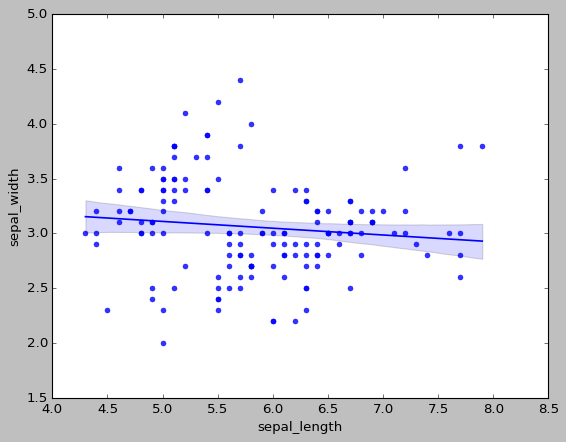

In [ ]:
sns.regplot(x=df["sepal_length"], y=df["sepal_width"])

In [ ]:
unemployment2020=pd.read_excel("https://docs.google.com/uc?id=161R6SzK9crGWUHelbjBODDlLHeycF0l4&export=download")

In [ ]:
unemployment2020.rename(columns={'Unemployment Rates for States, 2020 Annual Averages': 'State Name','Unnamed: 1': 'Rate','Unnamed: 2': 'Rank'},inplace=True)

In [ ]:
unemployment2020

,State Name,Rate,Rank
0,State,2020,Rank
1,NaN,rate,NaN
2,United States,8.1,NaN
3,NaN,NaN,NaN
4,Nebraska,4.1,1
5,South Dakota,4.3,2
6,Utah,4.7,3
7,Maine,5,4
8,Iowa,5.1,5
9,North Dakota,5.1,5


In [ ]:
del unemployment2020['Rank']

In [ ]:
unemployment2020

,State Name,Rate
0,State,2020
1,NaN,rate
2,United States,8.1
3,NaN,NaN
4,Nebraska,4.1
5,South Dakota,4.3
6,Utah,4.7
7,Maine,5
8,Iowa,5.1
9,North Dakota,5.1


In [ ]:
mergedOuter = pd.merge(price2020_poverty2020, unemployment2020, how='outer', on=['State Name'],indicator='exists')
mergedOuter

,State Name,Median home price in US$,Percent,_merge,Rate,exists
0,Alabama,138975.0,14.9,both,6.5,both
1,Alaska,300889.0,9.6,both,8.2,both
2,Arizona,268765.0,12.8,both,7.7,both
3,Arkansas,128101.0,15.2,both,6.1,both
4,California,554886.0,11.5,both,10.2,both
5,Colorado,397820.0,9.0,both,6.9,both
6,Connecticut,255555.0,9.7,both,7.8,both
7,Delaware,254108.0,10.9,both,7.6,both
8,District of Columbia,626911.0,15.0,both,8,both
9,Florida,245169.0,12.4,both,8.2,both


In [ ]:
mergedOuter['_merge'].value_counts()
mergedOuter['State Name'][mergedOuter['_merge']=='left_only']
mergedOuter['State Name'][mergedOuter['_merge']=='right_only']

both          51
right_only     5
left_only      0
Name: _merge, dtype: int64

Series([], Name: State Name, dtype: object)

27    National
52         NaN
53         NaN
54         NaN
55         NaN
Name: State Name, dtype: object

In [ ]:
mergedInner = pd.merge(price2020_poverty2020, unemployment2020, how='inner', on=['State Name'])
mergedInner

,State Name,Median home price in US$,Percent,_merge,Rate
0,Alabama,138975.0,14.9,both,6.5
1,Alaska,300889.0,9.6,both,8.2
2,Arizona,268765.0,12.8,both,7.7
3,Arkansas,128101.0,15.2,both,6.1
4,California,554886.0,11.5,both,10.2
5,Colorado,397820.0,9.0,both,6.9
6,Connecticut,255555.0,9.7,both,7.8
7,Delaware,254108.0,10.9,both,7.6
8,District of Columbia,626911.0,15.0,both,8
9,Florida,245169.0,12.4,both,8.2


In [ ]:
mergedLeft = pd.merge(price2020_poverty2020, unemployment2020, how='left', on=['State Name'])
mergedLeft

,State Name,Median home price in US$,Percent,_merge,Rate
0,Alabama,138975.0,14.9,both,6.5
1,Alaska,300889.0,9.6,both,8.2
2,Arizona,268765.0,12.8,both,7.7
3,Arkansas,128101.0,15.2,both,6.1
4,California,554886.0,11.5,both,10.2
5,Colorado,397820.0,9.0,both,6.9
6,Connecticut,255555.0,9.7,both,7.8
7,Delaware,254108.0,10.9,both,7.6
8,District of Columbia,626911.0,15.0,both,8
9,Florida,245169.0,12.4,both,8.2


In [ ]:
mergedRight = pd.merge(price2020_poverty2020, unemployment2020, how='left', on=['State Name'])
mergedRight

,State Name,Median home price in US$,Percent,_merge,Rate
0,Alabama,138975.0,14.9,both,6.5
1,Alaska,300889.0,9.6,both,8.2
2,Arizona,268765.0,12.8,both,7.7
3,Arkansas,128101.0,15.2,both,6.1
4,California,554886.0,11.5,both,10.2
5,Colorado,397820.0,9.0,both,6.9
6,Connecticut,255555.0,9.7,both,7.8
7,Delaware,254108.0,10.9,both,7.6
8,District of Columbia,626911.0,15.0,both,8
9,Florida,245169.0,12.4,both,8.2
